# **Predict the S&P Price**
## *EECS3401 - Group 11 - W2024*

---

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

# Load and View Full Dataset

In [148]:
# Define the directory containing the data
data_directory = "Data"

# Find the first zip file in the directory
zip_file_name = next((f for f in os.listdir(data_directory) if f.endswith('.zip')), None)
if not zip_file_name:
    raise FileNotFoundError("No zip file found in the data directory.")

# Process the zip file
print(f"Processing zip file: {zip_file_name}")
with zipfile.ZipFile(os.path.join(data_directory, zip_file_name), 'r') as zip_file:
    # Identify CSV files in the zip archive
    csv_files = [f for f in zip_file.namelist() if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the zip archive.")

    # Initialize dictionary to store DataFrames
    data_frames = {}

    # Extract and load each CSV file
    for csv_file in csv_files:
        with zip_file.open(csv_file) as file:
            data_frames[csv_file] = pd.read_csv(file)

# Accessing the DataFrames by their filenames ('sp500_companies.csv', 'sp500_index.csv', 'sp500_stocks.csv')
df_sp500_companies = data_frames.get('sp500_companies.csv')
df_sp500_index = data_frames.get('sp500_index.csv')
df_sp500_stocks = data_frames.get('sp500_stocks.csv')

Processing zip file: Data-2024-03-16.zip


In [149]:
# Companies dataset
df_sp500_companies

Exchange Symbol                    Shortname  \
0        NMS   MSFT        Microsoft Corporation   
1        NMS   AAPL                   Apple Inc.   
2        NMS   NVDA           NVIDIA Corporation   
3        NMS   AMZN             Amazon.com, Inc.   
4        NMS   GOOG                Alphabet Inc.   
..       ...    ...                          ...   
498      NYQ    CMA        Comerica Incorporated   
499      NMS   ZION    Zions Bancorporation N.A.   
500      NYQ    VFC             V.F. Corporation   
501      NYQ    WHR        Whirlpool Corporation   
502      NYQ    DOC  Healthpeak Properties, Inc.   

                                       Longname                  Sector  \
0                         Microsoft Corporation              Technology   
1                                    Apple Inc.              Technology   
2                            NVIDIA Corporation              Technology   
3                              Amazon.com, Inc.       Consumer Cyclical   
4                                 Alphabet Inc.  Communication Services   
..                                          ...                     ...   
498                       Comerica Incorporated      Financial Services   
499  Zions Bancorporation, National Association      Financial Services   
500                            V.F. Corporation       Consumer Cyclical   
501                       Whirlpool Corporation       Consumer Cyclical   
502                 Healthpeak Properties, Inc.             Real Estate   

                               Industry  Currentprice      Marketcap  \
0             Software - Infrastructure       416.420  3094183936000   
1                  Consumer Electronics       172.620  2665580593152   
2                        Semiconductors       878.365  2195912523776   
3                       Internet Retail       174.420  1811770245120   
4        Internet Content & Information       142.170  1761315782656   
..                                  ...           ...            ...   
498                    Banks - Regional        49.490     6556930560   
499                    Banks - Regional        39.790     5872964608   
500               Apparel Manufacturing        14.780     5746700288   
501  Furnishings, Fixtures & Appliances       105.120     5725056000   
502        REIT - Healthcare Facilities        17.240     4286294784   

           Ebitda  Revenuegrowth            City State        Country  \
0    1.184270e+11          0.176         Redmond    WA  United States   
1    1.301090e+11          0.021       Cupertino    CA  United States   
2    3.448000e+10          2.653     Santa Clara    CA  United States   
3    8.551500e+10          0.139         Seattle    WA  United States   
4    1.001720e+11          0.135   Mountain View    CA  United States   
..            ...            ...             ...   ...            ...   
498           NaN         -0.220          Dallas    TX  United States   
499           NaN         -0.119  Salt Lake City    UT  United States   
500  1.068373e+09         -0.162          Denver    CO  United States   
501  1.477000e+09          0.034   Benton Harbor    MI  United States   
502  1.151196e+09          0.056          Denver    CO  United States   

     Fulltimeemployees                                Longbusinesssummary  \
0             221000.0  Microsoft Corporation develops and supports so...   
1             161000.0  Apple Inc. designs, manufactures, and markets ...   
2              29600.0  NVIDIA Corporation provides graphics, and comp...   
3            1525000.0  Amazon.com, Inc. engages in the retail sale of...   
4             182502.0  Alphabet Inc. offers various products and plat...   
..                 ...                                                ...   
498             7496.0  Comerica Incorporated, through its subsidiarie...   
499             9679.0  Zions Bancorporation, National Association pro...   
500            19800.0  V.F. Corporation, t

In [150]:
# Index dataset
df_sp500_index
#> It appears our dataset spans over 10 years, so soon we will trim it to only 3 years

Date   S&P500
0     2014-03-17  1858.83
1     2014-03-18  1872.25
2     2014-03-19  1860.77
3     2014-03-20  1872.01
4     2014-03-21  1866.52
...          ...      ...
2513  2024-03-11  5117.94
2514  2024-03-12  5175.27
2515  2024-03-13  5165.31
2516  2024-03-14  5150.48
2517  2024-03-15  5117.09

[2518 rows x 2 columns]

In [151]:
# Stocks dataset
df_sp500_stocks

Date Symbol   Adj Close       Close        High         Low  \
0        2010-01-04    MMM   59.318886   83.019997   83.449997   82.669998   
1        2010-01-05    MMM   58.947342   82.500000   83.230003   81.699997   
2        2010-01-06    MMM   59.783295   83.669998   84.599998   83.510002   
3        2010-01-07    MMM   59.826176   83.730003   83.760002   82.120003   
4        2010-01-08    MMM   60.247749   84.320000   84.320000   83.300003   
...             ...    ...         ...         ...         ...         ...   
1797717  2024-03-11    ZTS  183.490005  183.490005  183.990005  180.419998   
1797718  2024-03-12    ZTS  181.350006  181.350006  183.830002  180.940002   
1797719  2024-03-13    ZTS  176.229996  176.229996  182.970001  175.990005   
1797720  2024-03-14    ZTS  173.880005  173.880005  177.490005  170.720001   
1797721  2024-03-15    ZTS  172.570007  172.570007  175.509995  171.610001   

               Open     Volume  
0         83.089996  3043700.0  
1         82.800003  2847000.0  
2         83.879997  5268500.0  
3         83.320000  4470100.0  
4         83.690002  3405800.0  
...             ...        ...  
1797717  182.619995  3383500.0  
1797718  183.649994  2598400.0  
1797719  181.600006  5947400.0  
1797720  177.490005  6432600.0  
1797721  173.779999  3399500.0  

[1797722 rows x 8 columns]

In [152]:
# Number of distinct companies in the S&P since 2014
print(f"There are {df_sp500_companies['Symbol'].nunique()} companies which were in the S&P since the year 2010\n")

# Find the percentage of the S&P 500 each sector makes up
# Count the occurrences of each unique sector
sector_counts = df_sp500_companies['Sector'].value_counts()
total_entries = len(df_sp500_companies)
sector_percentages = (sector_counts / total_entries) * 100 # Convert the counts to percentages
print("% of the S&P 500 each sector makes up")
print(sector_percentages)

There are 503 companies which were in the S&P since the year 2010

% of the S&P 500 each sector makes up
Sector
Technology                14.910537
Industrials               14.512922
Financial Services        13.320080
Healthcare                12.922465
Consumer Cyclical         11.530815
Consumer Defensive         7.355865
Real Estate                6.163022
Utilities                  5.964215
Energy                     4.572565
Communication Services     4.373757
Basic Materials            4.373757
Name: count, dtype: float64


---

# Data Manipulation and Feature Creations

In [153]:
df_sp500_full = df_sp500_index # Take the S&P500 and dates from sp500_index dataset

# Convert Date column to datetime format and set as the index
df_sp500_full['Date'] = pd.to_datetime(df_sp500_full['Date'])
df_sp500_full.set_index('Date', inplace=True)

# Shift the S&P500 column to represent yesterday's data
df_sp500_full['S&P500_Yesterday'] = df_sp500_full['S&P500'].shift(1)

# Calculate SMAs based on the shifted S&P500 data
df_sp500_full['10d_SMA_Yesterday'] = df_sp500_full['S&P500_Yesterday'].rolling(window=10).mean()
df_sp500_full['30d_SMA_Yesterday'] = df_sp500_full['S&P500_Yesterday'].rolling(window=30).mean()
df_sp500_full['90d_SMA_Yesterday'] = df_sp500_full['S&P500_Yesterday'].rolling(window=90).mean()

# Calculating MACD indicators based on the SMAs of shifted 'S&P500'
df_sp500_full['MACD_short_medium_Yesterday'] = df_sp500_full['10d_SMA_Yesterday'] - df_sp500_full['30d_SMA_Yesterday']
df_sp500_full['MACD_medium_long_Yesterday'] = df_sp500_full['30d_SMA_Yesterday'] - df_sp500_full['90d_SMA_Yesterday']
df_sp500_full['MACD_short_long_Yesterday'] = df_sp500_full['10d_SMA_Yesterday'] - df_sp500_full['90d_SMA_Yesterday']

# Merge volume data from df_sp500_companies dataset and shift to represent yesterday's volume
df_volume_agg = df_sp500_stocks.groupby('Date')['Volume'].sum().reset_index()
df_volume_agg['Date'] = pd.to_datetime(df_volume_agg['Date'])
df_volume_agg.set_index('Date', inplace=True)
df_sp500_full = pd.merge(df_sp500_full, df_volume_agg,left_index=True, right_index=True,how='left')
df_sp500_full['Volume_Yesterday'] = df_sp500_full['Volume'].shift(1)

# Calculate volume MAs based on Volume_Yesterday
df_sp500_full['10d_Volume_MA_Yesterday'] = df_sp500_full['Volume_Yesterday'].rolling(window=10).mean()
df_sp500_full['30d_Volume_MA_Yesterday'] = df_sp500_full['Volume_Yesterday'].rolling(window=30).mean()

# Shift Market Direction to use yesterday's S&P500 data
df_sp500_full['Market_Direction_Yesterday'] = np.sign(df_sp500_full['S&P500_Yesterday'].diff())

# Calculate OBV based on shifted Market Direction and yesterday's Volume
df_sp500_full['OBV_Yesterday'] = (df_sp500_full['Market_Direction_Yesterday'] * df_sp500_full['Volume_Yesterday']).cumsum()

# Volume Oscillator based on volume MAs of yesterday's volume
df_sp500_full['Volume_Oscillator_Yesterday'] = df_sp500_full['10d_Volume_MA_Yesterday'] - df_sp500_full['30d_Volume_MA_Yesterday']

# column for today's day of the week
df_sp500_full['Day_of_Week_Today'] = df_sp500_full.index.day_name()

# column for yesterday's day of the week by shifting the index by one day
df_sp500_full['Day_of_Week_Yesterday'] = df_sp500_full.index.to_series().shift(1).dt.day_name()

# Reorder columns to highlight the shifted data as the foundation for analysis
columns_ordered = ['S&P500', 'S&P500_Yesterday', 'Volume', 'Volume_Yesterday'] + [col for col in df_sp500_full.columns if col not in ['S&P500', 'S&P500_Yesterday', 'Volume', 'Volume_Yesterday']]
df_sp500_full = df_sp500_full[columns_ordered]

# Trim the first 90 days to account for moving averages and ensure all features have data
df_sp500_full = df_sp500_full.iloc[90:]

# Display the updated dataframe structure
df_sp500_full

S&P500  S&P500_Yesterday        Volume  Volume_Yesterday  \
Date                                                                    
2014-07-24  1987.98           1987.01  2.537793e+09      2.340862e+09   
2014-07-25  1978.34           1987.98  2.312308e+09      2.537793e+09   
2014-07-28  1978.91           1978.34  2.235974e+09      2.312308e+09   
2014-07-29  1969.95           1978.91  2.305776e+09      2.235974e+09   
2014-07-30  1970.07           1969.95  2.320619e+09      2.305776e+09   
...             ...               ...           ...               ...   
2024-03-11  5117.94           5123.69  2.212667e+09      2.436115e+09   
2024-03-12  5175.27           5117.94  2.320705e+09      2.212667e+09   
2024-03-13  5165.31           5175.27  2.426582e+09      2.320705e+09   
2024-03-14  5150.48           5165.31  2.662230e+09      2.426582e+09   
2024-03-15  5117.09           5150.48  5.156938e+09      2.662230e+09   

            10d_SMA_Yesterday  30d_SMA_Yesterday  90d_SMA_Yesterday  \
Date                                                                  
2014-07-24           1974.471        1963.735667        1908.897333   
2014-07-25           1976.801        1965.205333        1910.332333   
2014-07-28           1977.878        1966.813000        1911.511111   
2014-07-29           1978.059        1968.238000        1912.823778   
2014-07-30           1977.726        1969.310333        1913.912000   
...                       ...                ...                ...   
2024-03-11           5104.623        5018.708000        4750.989111   
2024-03-12           5109.464        5026.273667        4761.557111   
2024-03-13           5119.173        5034.518333        4772.462333   
2024-03-14           5128.728        5042.529667        4782.767333   
2024-03-15           5134.149        5052.690667        4792.019556   

            MACD_short_medium_Yesterday  MACD_medium_long_Yesterday  \
Date                                                                  
2014-07-24                    10.735333                   54.838333   
2014-07-25                    11.595667                   54.873000   
2014-07-28                    11.065000                   55.301889   
2014-07-29                     9.821000                   55.414222   
2014-07-30                     8.415667                   55.398333   
...                                 ...                         ...   
2024-03-11                    85.915000                  267.718889   
2024-03-12                    83.190333                  264.716556   
2024-03-13                    84.654667                  262.056000   
2024-03-14                    86.198333                  259.762333   
2024-03-15                    81.458333                  260.671111   

            MACD_short_long_Yesterday  10d_Volume_MA_Yesterday  \
Date                                                             
2014-07-24                  65.573667             2.305126e+09   
2014-07-25                  66.468667             2.346201e+09   
2014-07-28                  66.366889             2.390849e+09   
2014-07-29                  65.235222             2.402401e+09   
2014-07-30                  63.814000             2.379022e+09   
...                               ...                      ...   
2024-03-11                 353.633889             2.532677e+09   
2024-03-12                 347.906889             2.527104e+09   
2024-03-13                 346.710667             2.543175e+09   
2024-03-14                 345.960667             2.576152e+09   
2024-03-15                 342.129444             2.509847e+09   

            30d_Volume_MA_Yesterday  Market_Direction_Yesterday  \
Date                                                              
2014-07-24             2.243913e+09                         1.0   
2014-07-25             2.261311e+09                         1.0   
2014-07-28             2.259928e+09                        -1.0   
2014-07-29           

### Only use the last 3 years of data

In [154]:
last_day = df_sp500_full.index.max()
days_to_keep = 365 * 3 # 3 years
start_date_to_keep = last_day - pd.Timedelta(days=days_to_keep)
df_sp500_full = df_sp500_full[df_sp500_full.index >= start_date_to_keep] # Remove all but the last 3 years of data
df_sp500_full

S&P500  S&P500_Yesterday        Volume  Volume_Yesterday  \
Date                                                                    
2021-03-16  3962.71           3968.94  2.554102e+09      2.526074e+09   
2021-03-17  3974.12           3962.71  2.662995e+09      2.554102e+09   
2021-03-18  3915.46           3974.12  2.900345e+09      2.662995e+09   
2021-03-19  3913.10           3915.46  4.998932e+09      2.900345e+09   
2021-03-22  3940.59           3913.10  2.573021e+09      4.998932e+09   
...             ...               ...           ...               ...   
2024-03-11  5117.94           5123.69  2.212667e+09      2.436115e+09   
2024-03-12  5175.27           5117.94  2.320705e+09      2.212667e+09   
2024-03-13  5165.31           5175.27  2.426582e+09      2.320705e+09   
2024-03-14  5150.48           5165.31  2.662230e+09      2.426582e+09   
2024-03-15  5117.09           5150.48  5.156938e+09      2.662230e+09   

            10d_SMA_Yesterday  30d_SMA_Yesterday  90d_SMA_Yesterday  \
Date                                                                  
2021-03-16           3874.764        3881.155667        3749.803556   
2021-03-17           3884.006        3887.450667        3756.398556   
2021-03-18           3899.446        3892.377667        3762.295000   
2021-03-19           3914.145        3895.220667        3766.795111   
2021-03-22           3921.261        3896.599333        3771.280222   
...                       ...                ...                ...   
2024-03-11           5104.623        5018.708000        4750.989111   
2024-03-12           5109.464        5026.273667        4761.557111   
2024-03-13           5119.173        5034.518333        4772.462333   
2024-03-14           5128.728        5042.529667        4782.767333   
2024-03-15           5134.149        5052.690667        4792.019556   

            MACD_short_medium_Yesterday  MACD_medium_long_Yesterday  \
Date                                                                  
2021-03-16                    -6.391667                  131.352111   
2021-03-17                    -3.444667                  131.052111   
2021-03-18                     7.068333                  130.082667   
2021-03-19                    18.924333                  128.425556   
2021-03-22                    24.661667                  125.319111   
...                                 ...                         ...   
2024-03-11                    85.915000                  267.718889   
2024-03-12                    83.190333                  264.716556   
2024-03-13                    84.654667                  262.056000   
2024-03-14                    86.198333                  259.762333   
2024-03-15                    81.458333                  260.671111   

            MACD_short_long_Yesterday  10d_Volume_MA_Yesterday  \
Date                                                             
2021-03-16                 124.960444             2.949766e+09   
2021-03-17                 127.607444             2.961547e+09   
2021-03-18                 137.151000             2.935752e+09   
2021-03-19                 147.349889             2.843745e+09   
2021-03-22                 149.980778             2.969962e+09   
...                               ...                      ...   
2024-03-11                 353.633889             2.532677e+09   
2024-03-12                 347.906889             2.527104e+09   
2024-03-13                 346.710667             2.543175e+09   
2024-03-14                 345.960667             2.576152e+09   
2024-03-15                 342.129444             2.509847e+09   

            30d_Volume_MA_Yesterday  Market_Direction_Yesterday  \
Date                                                              
2021-03-16             2.707196e+09                         1.0   
2021-03-17             2.703724e+09                        -1.0   
2021-03-18             2.702231e+09                         1.0   
2021-03-19           

---

# EDA

In [155]:
# Summary statistics for the entire dataset
summary_statistics = df_sp500_full.describe()
summary_statistics

S&P500  S&P500_Yesterday        Volume  Volume_Yesterday  \
count   756.000000        756.000000  7.560000e+02      7.560000e+02   
mean   4293.167024       4291.648307  2.490731e+09      2.487251e+09   
std     322.784174        321.601324  5.286779e+08      5.196868e+08   
min    3577.030000       3577.030000  9.010519e+08      9.010519e+08   
25%    4061.022500       4059.782500  2.182891e+09      2.182891e+09   
50%    4289.655000       4288.545000  2.391323e+09      2.391323e+09   
75%    4504.335000       4503.180000  2.674863e+09      2.673892e+09   
max    5175.270000       5175.270000  5.695334e+09      5.695334e+09   

       10d_SMA_Yesterday  30d_SMA_Yesterday  90d_SMA_Yesterday  \
count         756.000000         756.000000         756.000000   
mean         4284.158491        4268.348009        4226.421562   
std           311.162259         290.664509         252.305945   
min          3642.977000        3717.448000        3749.803556   
25%          4029.026500        4024.707667        3988.876333   
50%          4286.953000        4286.865667        4239.161611   
75%          4483.770250        4460.905750        4426.271028   
max          5134.149000        5052.690667        4792.019556   

       MACD_short_medium_Yesterday  MACD_medium_long_Yesterday  \
count                   756.000000                  756.000000   
mean                     15.810481                   41.926448   
std                      88.483655                  133.360337   
min                    -222.797333                 -281.752444   
25%                     -47.832417                  -45.661278   
50%                      35.299500                   73.440889   
75%                      84.932667                  128.474472   
max                     174.732333                  277.227111   

       MACD_short_long_Yesterday  10d_Volume_MA_Yesterday  \
count                 756.000000             7.560000e+02   
mean                   57.736929             2.489937e+09   
std                   181.760204             3.139072e+08   
min                  -441.443000             1.915240e+09   
25%                   -52.101083             2.267472e+09   
50%                    99.283056             2.448706e+09   
75%                   178.476889             2.694050e+09   
max                   370.036778             3.411307e+09   

       30d_Volume_MA_Yesterday  Market_Direction_Yesterday  OBV_Yesterday  \
count             7.560000e+02                  756.000000   7.560000e+02   
mean              2.494173e+09                    0.029101   3.110145e+11   
std               2.303234e+08                    1.000238   2.805858e+10   
min               2.014394e+09                   -1.000000   2.625322e+11   
25%               2.323809e+09                   -1.000000   2.830722e+11   
50%               2.472014e+09                    1.000000   3.173437e+11   
75%               2.626472e+09                    1.000000   3.312705e+11   
max               3.124551e+09                    1.000000   3.698496e+11   

       Volume_Oscillator_Yesterday  
count                 7.560000e+02  
mean                 -4.236237e+06  
std                   2.262721e+08  
min                  -6.180743e+08  
25%                  -1.519410e+08  
50%                   3.634722e+06  
75%                   1.409547e+08  
max                   7.159738e+08

### Findings for Market Performance
The S&P 500 index has shown significant growth with fluctuations.  There is a long-term upward trend in the market. 
Also we notice there is a large dip in 2020, followed by periods of high volatility through 2022 to 2023.  This shows how the market reacts to external factors.

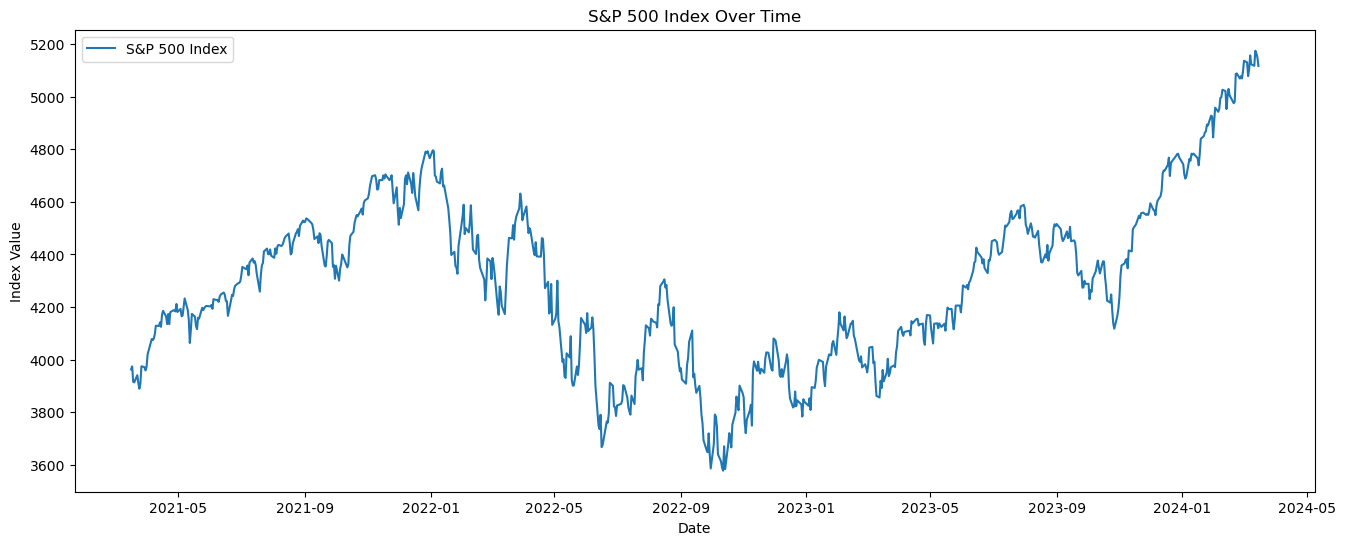

In [156]:
# Plotting the S&P 500 index over time
plt.figure(figsize=(16, 6))
plt.plot(df_sp500_full.index, df_sp500_full['S&P500'], label='S&P 500 Index')
plt.title('S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()

---

### Findings for Volume Analysis
Trading volume has been highly volatile, with peaks in activity especially during 2020. These spikes may show increased market activity during periods of significant events, such as the pandemic.

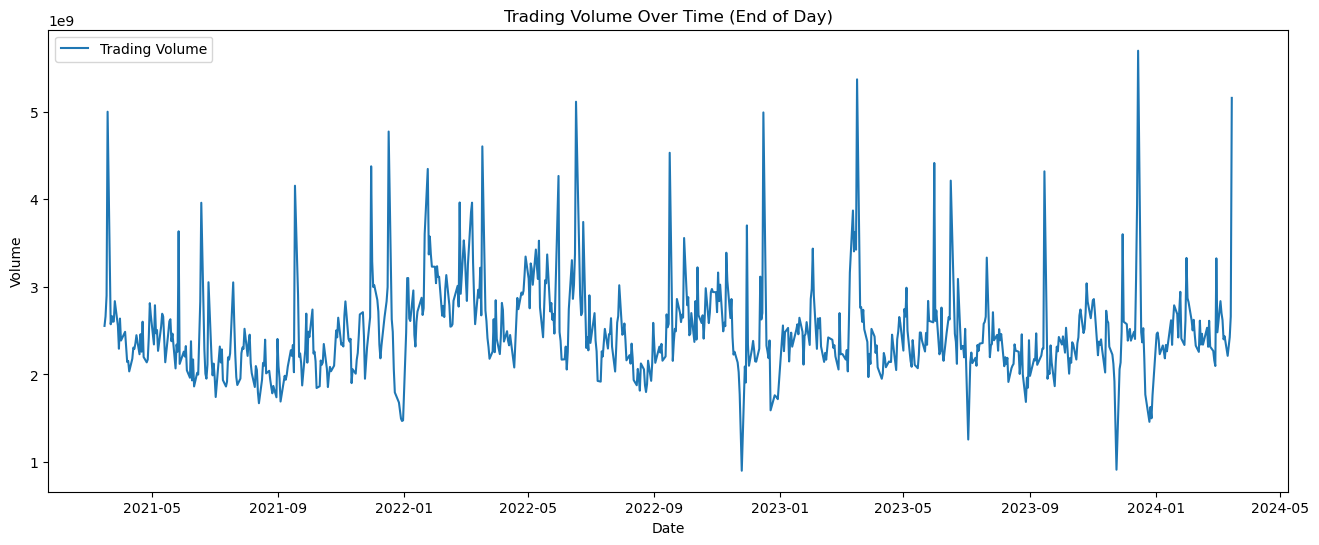

In [157]:
# Plotting the aggregated trading volume over time
plt.figure(figsize=(16, 6))
plt.plot(df_sp500_full.index, df_sp500_full['Volume'], label='Trading Volume')
plt.title('Trading Volume Over Time (End of Day)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

---

### Findings for Momentum Indicators
The MACD indicators, which help identify trend direction and momentum, shows high volatility with significant lows in 2020. This suggests periods of market uncertainty during these times.

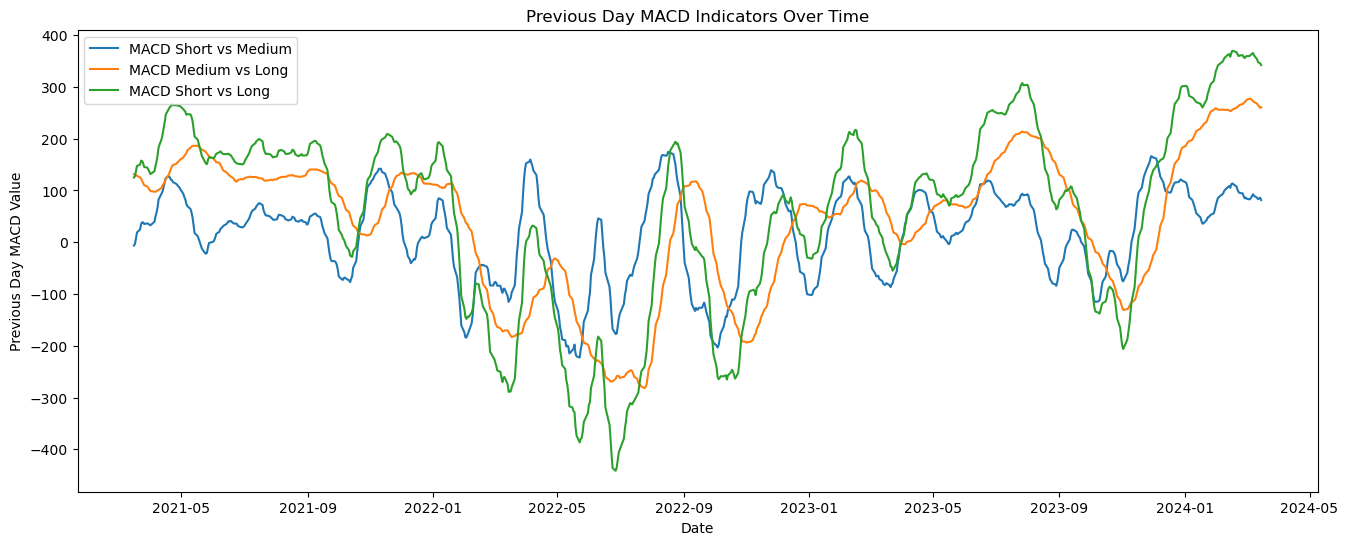

In [158]:
# Plotting MACD indicators
plt.figure(figsize=(16, 6))
plt.plot(df_sp500_full.index, df_sp500_full['MACD_short_medium_Yesterday'], label='MACD Short vs Medium')
plt.plot(df_sp500_full.index, df_sp500_full['MACD_medium_long_Yesterday'], label='MACD Medium vs Long')
plt.plot(df_sp500_full.index, df_sp500_full['MACD_short_long_Yesterday'], label='MACD Short vs Long')
plt.title('Previous Day MACD Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Previous Day MACD Value')
plt.legend()
plt.show()

---

### Findings for Volume Oscillator
The Volume Oscillator, which shows short-term vs. long-term volume trends, also displayed large movements in 2020.  This implies shifts in trading activity and the overall market sentiment.

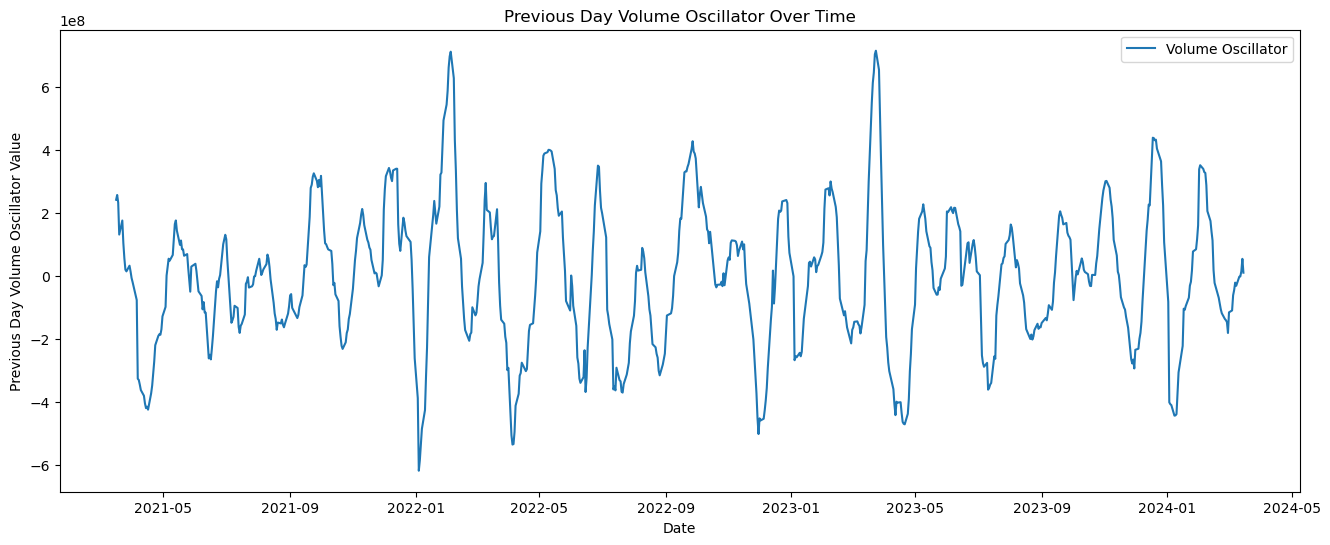

In [159]:
# Plotting the Volume Oscillator
plt.figure(figsize=(16, 6))
plt.plot(df_sp500_full.index, df_sp500_full['Volume_Oscillator_Yesterday'], label='Volume Oscillator')
plt.title('Previous Day Volume Oscillator Over Time')
plt.xlabel('Date')
plt.ylabel('Previous Day Volume Oscillator Value')
plt.legend()
plt.show()

---

# Correlations

y:\Apps\Anaconda\envs\AI-GPU\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


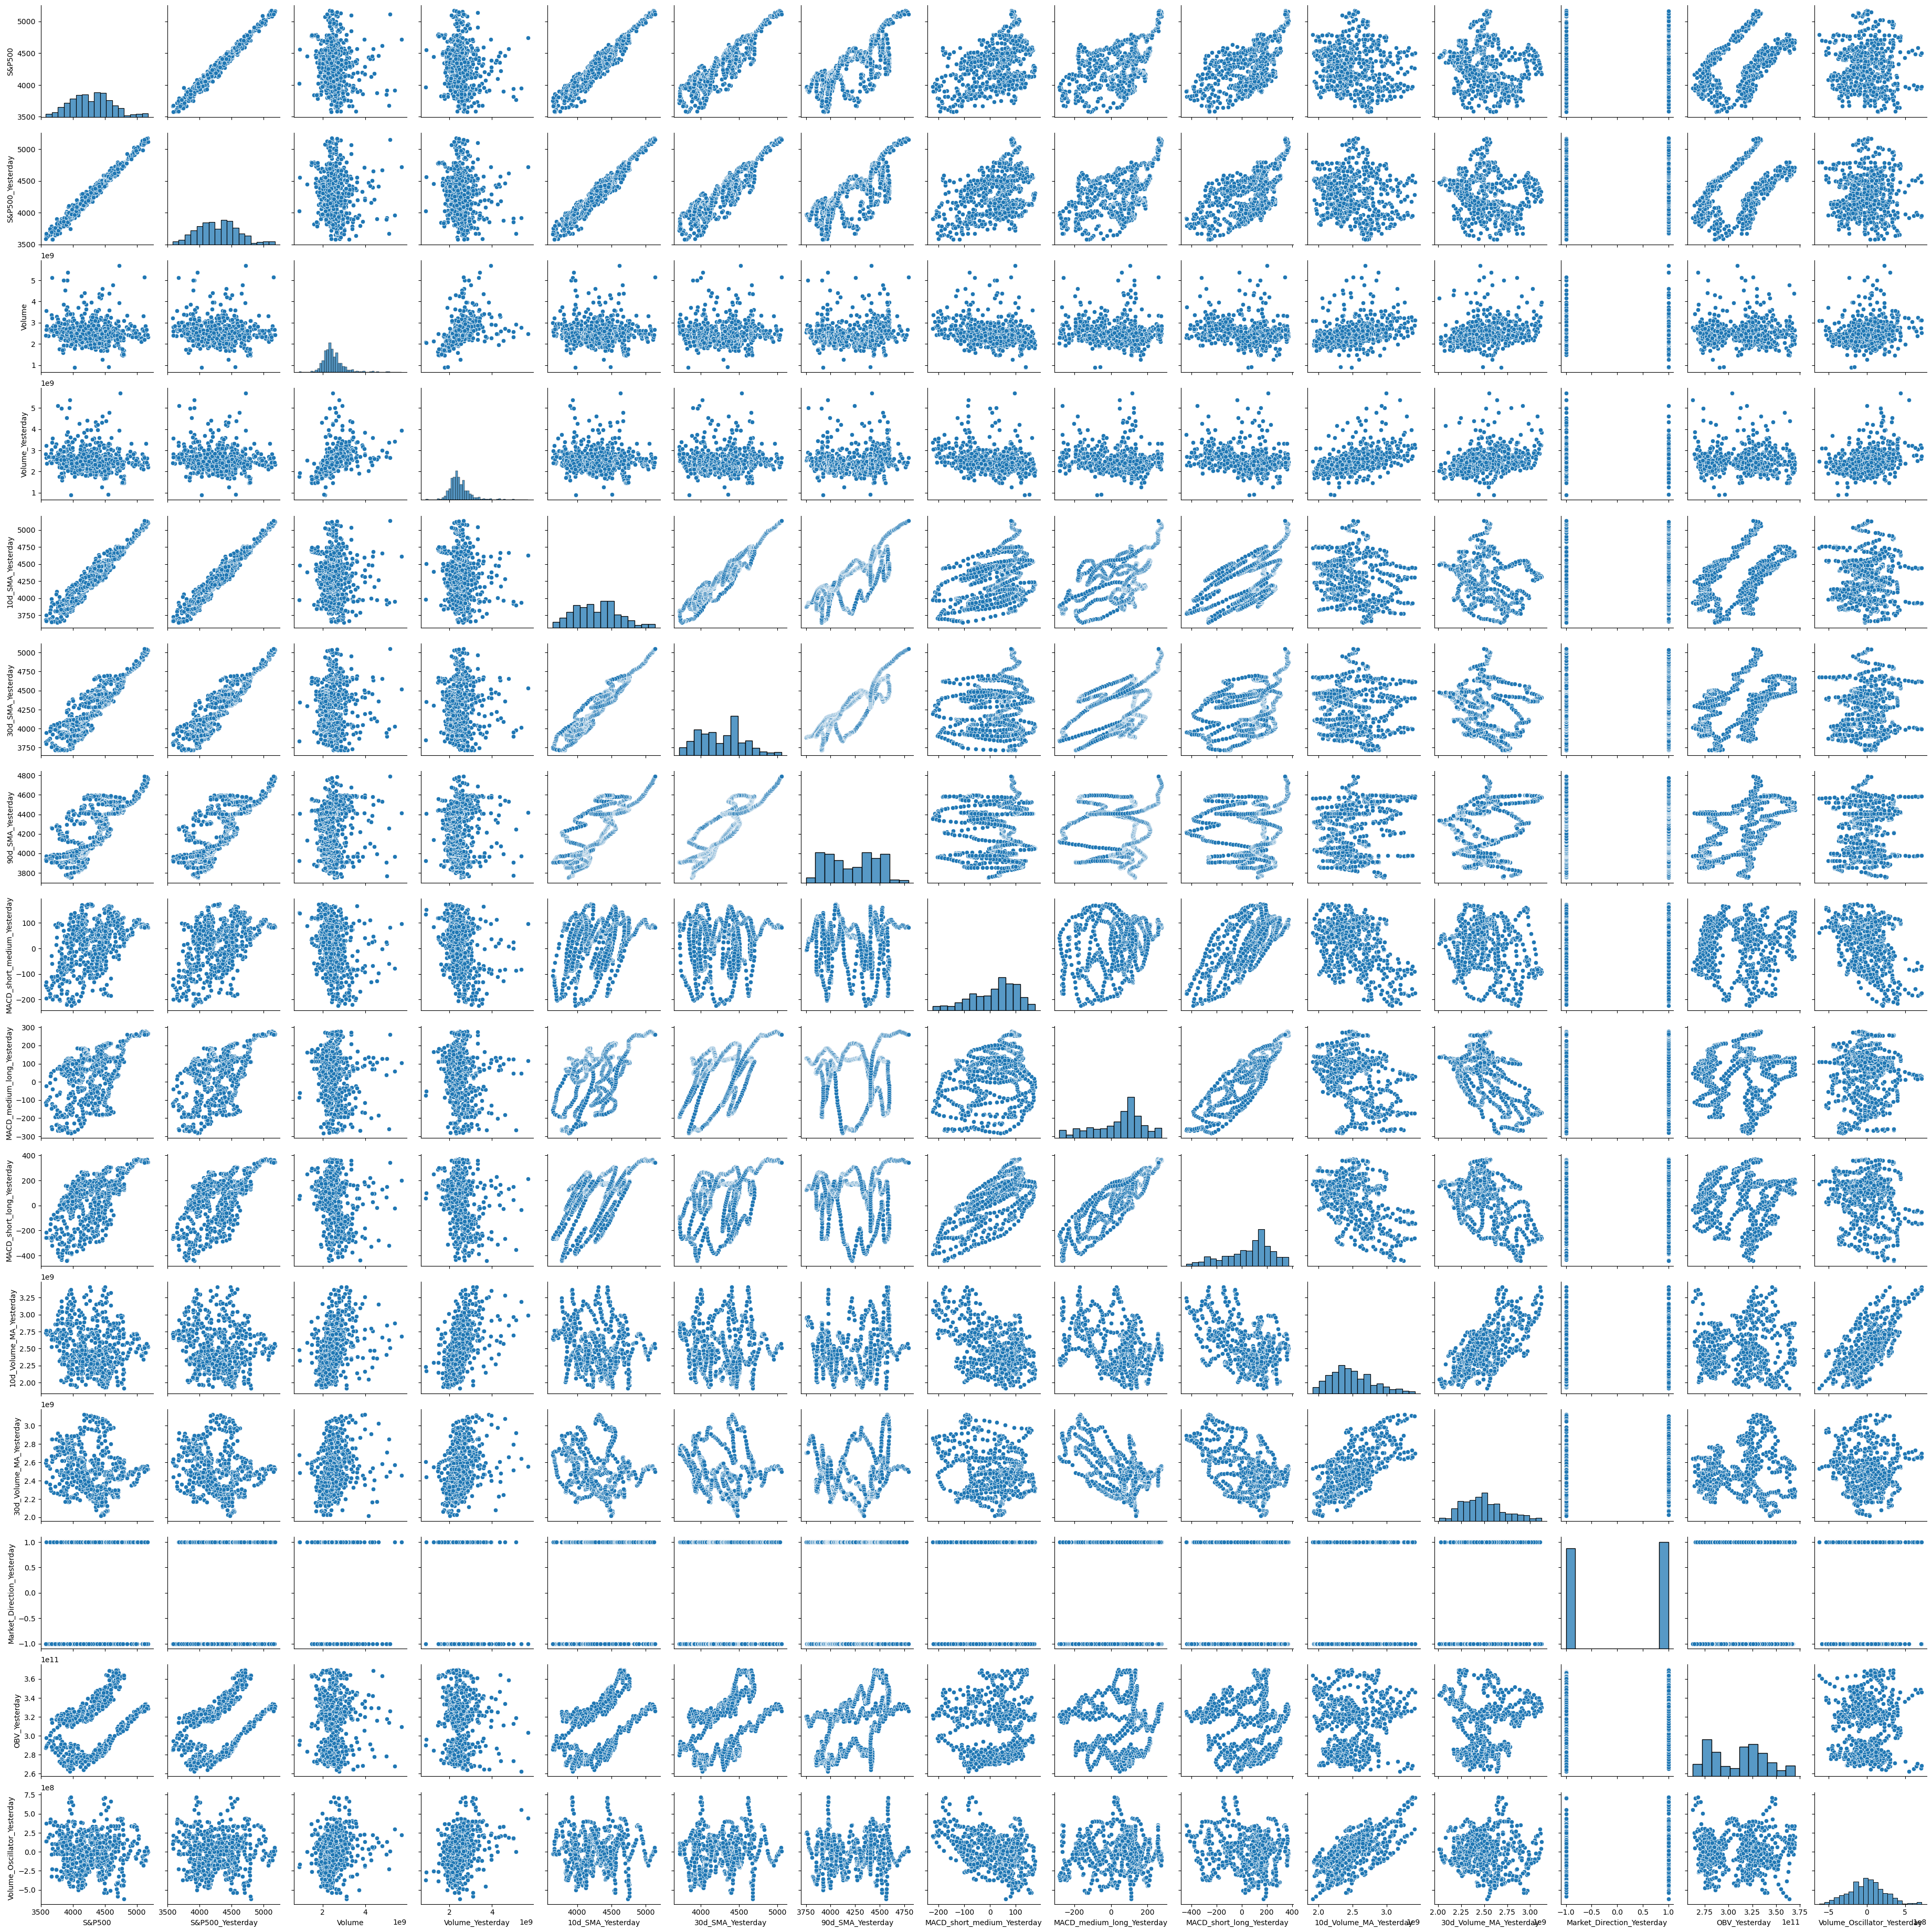

In [160]:
# Check for correlations between the attributes using sns.pairplot
sns.pairplot(df_sp500_full)

In [161]:
# Correlate the attributes in a matrix
correlation_matrix = df_sp500_full.corr(numeric_only=True)
correlation_matrix

S&P500  S&P500_Yesterday    Volume  \
S&P500                       1.000000          0.990084 -0.106696   
S&P500_Yesterday             0.990084          1.000000 -0.093808   
Volume                      -0.106696         -0.093808  1.000000   
Volume_Yesterday            -0.121710         -0.126472  0.487296   
10d_SMA_Yesterday            0.965152          0.973960 -0.048089   
30d_SMA_Yesterday            0.906110          0.914599  0.026286   
90d_SMA_Yesterday            0.762161          0.769217  0.119281   
MACD_short_medium_Yesterday  0.417533          0.420623 -0.255457   
MACD_medium_long_Yesterday   0.532965          0.538117 -0.168379   
MACD_short_long_Yesterday    0.594306          0.599591 -0.247903   
10d_Volume_MA_Yesterday     -0.164365         -0.172291  0.360769   
30d_Volume_MA_Yesterday     -0.192238         -0.197725  0.288861   
Market_Direction_Yesterday   0.131389          0.134069 -0.115795   
OBV_Yesterday                0.444737          0.455580  0.040322   
Volume_Oscillator_Yesterday -0.032344         -0.037754  0.206462   

                             Volume_Yesterday  10d_SMA_Yesterday  \
S&P500                              -0.121710           0.965152   
S&P500_Yesterday                    -0.126472           0.973960   
Volume                               0.487296          -0.048089   
Volume_Yesterday                     1.000000          -0.078556   
10d_SMA_Yesterday                   -0.078556           1.000000   
30d_SMA_Yesterday                    0.000443           0.959040   
90d_SMA_Yesterday                    0.102270           0.811658   
MACD_short_medium_Yesterday         -0.277704           0.366208   
MACD_medium_long_Yesterday          -0.192520           0.554682   
MACD_short_long_Yesterday           -0.276446           0.585255   
10d_Volume_MA_Yesterday              0.507831          -0.174785   
30d_Volume_MA_Yesterday              0.355409          -0.213835   
Market_Direction_Yesterday          -0.119235           0.040903   
OBV_Yesterday                        0.023460           0.466904   
Volume_Oscillator_Yesterday          0.342742          -0.024815   

                             30d_SMA_Yesterday  90d_SMA_Yesterday  \
S&P500                                0.906110           0.762161   
S&P500_Yesterday                      0.914599           0.769217   
Volume                                0.026286           0.119281   
Volume_Yesterday                      0.000443           0.102270   
10d_SMA_Yesterday                     0.959040           0.811658   
30d_SMA_Yesterday                     1.000000           0.888776   
90d_SMA_Yesterday                     0.888776           1.000000   
MACD_short_medium_Yesterday           0.087615          -0.065301   
MACD_medium_long_Yesterday            0.498058           0.045213   
MACD_short_long_Yesterday             0.408085           0.001383   
10d_Volume_MA_Yesterday              -0.056010           0.131527   
30d_Volume_MA_Yesterday              -0.177439           0.086682   
Market_Direction_Yesterday            0.032437           0.019737   
OBV_Yesterday                         0.489916           0.535057   
Volume_Oscillator_Yesterday           0.102913           0.094233   

                             MACD_short_medium_Yesterday  \
S&P500                                          0.417533   
S&P500_Yesterday                                0.420623   
Volume                                         -0.255457   
Volume_Yesterday                               -0.277704   
10d_SMA_Yesterday                               0.366208   
30d_SMA_Yesterday                               0.087615   
90d_SMA_Yesterday                              -0.065301   
MACD_short_medium_Yesterday                     1.000000   
MACD_medium_long_Yesterday                      0.314504   
MACD_short_long_Yesterday                       0.717572   
10d_Volume_MA_Yesterday                        -0.430658   
30d_Volume_M

In [162]:
# Now only relate attributes to the S&P500
correlation_matrix["S&P500"].sort_values(ascending=False)

S&P500                         1.000000
S&P500_Yesterday               0.990084
10d_SMA_Yesterday              0.965152
30d_SMA_Yesterday              0.906110
90d_SMA_Yesterday              0.762161
MACD_short_long_Yesterday      0.594306
MACD_medium_long_Yesterday     0.532965
OBV_Yesterday                  0.444737
MACD_short_medium_Yesterday    0.417533
Market_Direction_Yesterday     0.131389
Volume_Oscillator_Yesterday   -0.032344
Volume                        -0.106696
Volume_Yesterday              -0.121710
10d_Volume_MA_Yesterday       -0.164365
30d_Volume_MA_Yesterday       -0.192238
Name: S&P500, dtype: float64

---

# Prepare Data for Modeling
(Scaling, Encoding, etc )

In [163]:
# Check for missing values
df_sp500_full.isna().sum()
#> No missing values found

S&P500                         0
S&P500_Yesterday               0
Volume                         0
Volume_Yesterday               0
10d_SMA_Yesterday              0
30d_SMA_Yesterday              0
90d_SMA_Yesterday              0
MACD_short_medium_Yesterday    0
MACD_medium_long_Yesterday     0
MACD_short_long_Yesterday      0
10d_Volume_MA_Yesterday        0
30d_Volume_MA_Yesterday        0
Market_Direction_Yesterday     0
OBV_Yesterday                  0
Volume_Oscillator_Yesterday    0
Day_of_Week_Today              0
Day_of_Week_Yesterday          0
dtype: int64

In [164]:
# Check for duplicate rows
df_sp500_full.duplicated().sum()
#> No duplicates found

0

---

# Pipeline Processing
1. Scale the numerical columns with StandardScaler
2. Encode any categorical columns with OneHotEncoder

In [165]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_sp500_full.drop('Volume', axis=1, inplace=True) # exclude the volume

# create the categorical and numerical columns
num_cols = df_sp500_full.select_dtypes(include='number').columns.to_list()
cat_cols = df_sp500_full.select_dtypes(exclude='number').columns.to_list()
num_cols.remove("S&P500") # exclude the target

# create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# Set the estimators and transformations using ColumnTransformer
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

# Display the full pipeline
preprocessing

C:\Users\ABC\AppData\Local\Temp\ipykernel_10676\1891397809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp500_full.drop('Volume', axis=1, inplace=True) # exclude the volume


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['S&P500_Yesterday', 'Volume_Yesterday',
                                  '10d_SMA_Yesterday', '30d_SMA_Yesterday',
                                  '90d_SMA_Yesterday',
                                  'MACD_short_medium_Yesterday',
                                  'MACD_medium_long_Yesterday',
                                  'MACD_short_long_Yesterday',
                                  '10d_Volume_MA_Yesterday',
                                  '30d_Volume_MA_Yesterday',
                                  'Market_Direction_Yesterday', 'OBV_Yesterday',
                                  'Volume_Oscillator_Yesterday']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Day_of_Week_Today',
                                  'Day_of_Week_Yesterday'])])

## Set target and features

In [166]:
# Target
target_label = "S&P500"
target_label

'S&P500'

In [167]:
# Features
feature_names = df_sp500_full.columns.to_list()[1:] # list of column labels (excluding the target)
feature_names

['S&P500_Yesterday',
 'Volume_Yesterday',
 '10d_SMA_Yesterday',
 '30d_SMA_Yesterday',
 '90d_SMA_Yesterday',
 'MACD_short_medium_Yesterday',
 'MACD_medium_long_Yesterday',
 'MACD_short_long_Yesterday',
 '10d_Volume_MA_Yesterday',
 '30d_Volume_MA_Yesterday',
 'Market_Direction_Yesterday',
 'OBV_Yesterday',
 'Volume_Oscillator_Yesterday',
 'Day_of_Week_Today',
 'Day_of_Week_Yesterday']

# Train and Test Split

In [168]:
from sklearn.model_selection import train_test_split

# Here we used a specific date to divide the dataset since it's sequential
# And easier to visualize 80% training split
split_date = '2023-08-01' # YYYY-MM-DD

# Split the dataset based on the date
train = df_sp500_full.loc[df_sp500_full.index < split_date]
test = df_sp500_full.loc[df_sp500_full.index >= split_date]

# Separate features and target
y_train = train[target_label]
X_train_preprocessed = train[feature_names]

y_test = test[target_label]
X_test_preprocessed = test[feature_names]

# Fit the preprocessing pipeline on the training data
preprocessing.fit(X_train_preprocessed)

# Transform the training and testing data
X_train = preprocessing.transform(X_train_preprocessed)
X_test = preprocessing.transform(X_test_preprocessed)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((598, 23), (598,), (158, 23), (158,))

In [169]:
X_test

array([[ 1.39135804, -0.1100599 ,  1.33329179, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.34687705, -0.44930879,  1.34140133, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.11650694,  0.01480219,  1.32188996, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.52379087, -0.3554327 ,  3.42214975, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.48756595, -0.15557218,  3.45777581, ...,  0.        ,
         0.        ,  1.        ],
       [ 3.43362865,  0.2892488 ,  3.47798815, ...,  1.        ,
         0.        ,  0.        ]])

---

# S&P500 Price Prediction Models

## #1 Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model with the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = linear_regression_model.predict(X_train)  # Predictions on the training set
y_test_pred = linear_regression_model.predict(X_test)    # Predictions on the test set

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation Metrics")
# print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
# print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
# print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
# print(f"Train R-squared (R2) Score: {train_r2:.2f}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")

Linear Regression Model Evaluation Metrics
Test MAE: 27.50
Test MSE: 1245.00
Test RMSE: 35.28
Test R-squared (R2) Score: 0.98


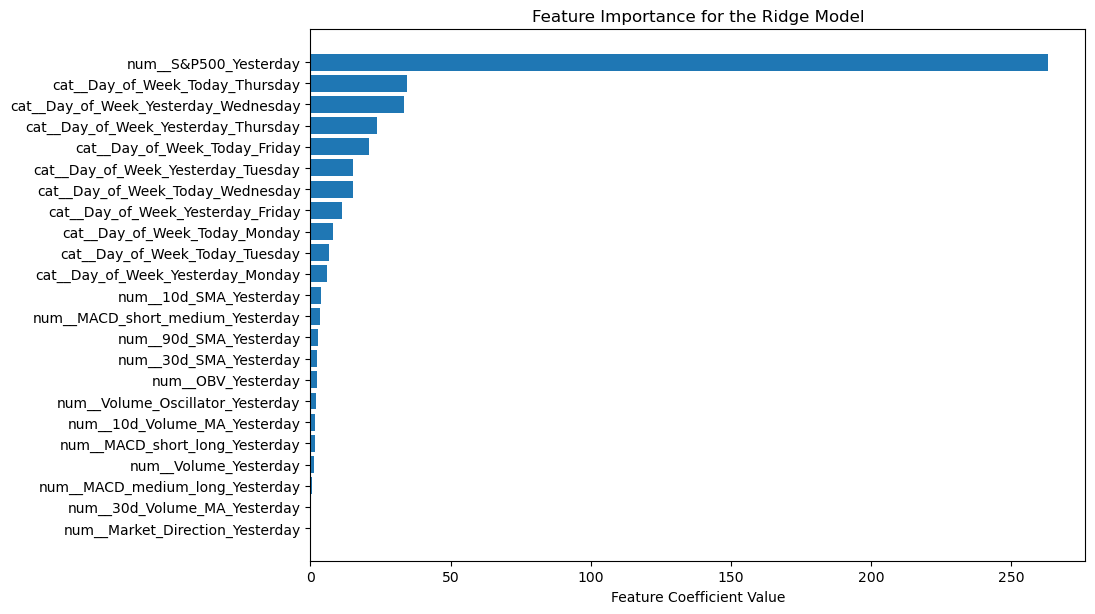

In [171]:
# Get the most influential features from the Ridge Regression model
feature_importance = np.abs(linear_regression_model.coef_)
feature_names_processed = preprocessing.get_feature_names_out()

# Map feature importance values to their corresponding feature names
feature_importance_dict = dict(zip(feature_names_processed, feature_importance))

# Sort features based on importance
def get_importance(item):
    return item[1]
sorted_features = sorted(feature_importance_dict.items(), key=get_importance,reverse=True)

# Extract separate lists of names and importance for plotting
sorted_names = [name for name, importance in sorted_features]
sorted_importance = [importance for name, importance in sorted_features]

# Plot all the features by their importance
plt.figure(figsize=(10, len(sorted_features) * 0.3))
plt.title("Feature Importance for the Ridge Model")
plt.barh(range(len(sorted_features)), sorted_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_names)
plt.xlabel("Feature Coefficient Value")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

## #2 Ridge Regression

In [172]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model with the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Print the evaluation metrics for Ridge Regression
print("Ridge Regression Model Evaluation Metrics")
print(f"Test MAE: {test_mae_ridge:.2f}")
print(f"Test MSE: {test_mse_ridge:.2f}")
print(f"Test RMSE: {test_rmse_ridge:.2f}")
print(f"Test R-squared (R2) Score: {test_r2_ridge:.2f}")


Ridge Regression Model Evaluation Metrics
Test MAE: 27.98
Test MSE: 1259.24
Test RMSE: 35.49
Test R-squared (R2) Score: 0.98


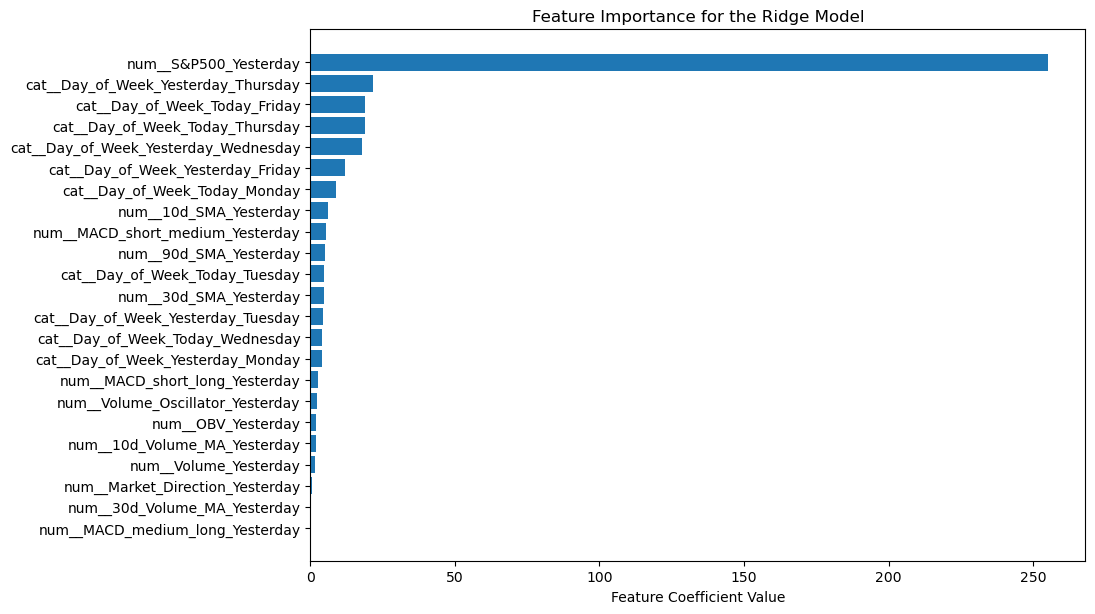

In [173]:
# Get the most influential features from the Ridge Regression model
feature_importance = np.abs(ridge_model.coef_)
feature_names_processed = preprocessing.get_feature_names_out()

# Map feature importance values to their corresponding feature names
feature_importance_dict = dict(zip(feature_names_processed, feature_importance))

# Sort features based on importance
def get_importance(item):
    return item[1]
sorted_features = sorted(feature_importance_dict.items(), key=get_importance,reverse=True)

# Extract separate lists of names and importance for plotting
sorted_names = [name for name, importance in sorted_features]
sorted_importance = [importance for name, importance in sorted_features]

# Plot all the features by their importance
plt.figure(figsize=(10, len(sorted_features) * 0.3))
plt.title("Feature Importance for the Ridge Model")
plt.barh(range(len(sorted_features)), sorted_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_names)
plt.xlabel("Feature Coefficient Value")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

## #3 Random Forest

In [174]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred_rf = random_forest_model.predict(X_train)  # Predictions on the training set
y_test_pred_rf = random_forest_model.predict(X_test)    # Predictions on the test set

# Evaluate the model
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest Model Evaluation Metrics")
print(f"Test MAE: {test_mae_rf:.2f}")
print(f"Test MSE: {test_mse_rf:.2f}")
print(f"Test RMSE: {test_rmse_rf:.2f}")
print(f"Test R-squared (R2) Score: {test_r2_rf:.2f}")

Random Forest Model Evaluation Metrics
Test MAE: 101.53
Test MSE: 27035.36
Test RMSE: 164.42
Test R-squared (R2) Score: 0.65


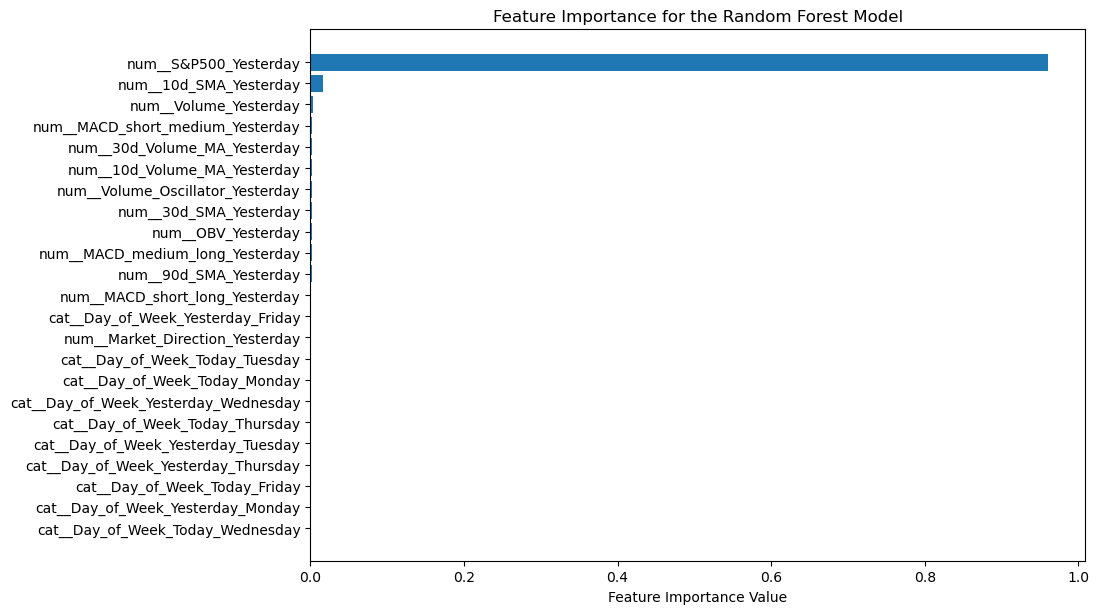

In [175]:
# Get the most influential features from the Random Forest model
feature_importance = np.abs(random_forest_model.feature_importances_)
feature_names_processed = preprocessing.get_feature_names_out()

# Map feature importance values to their feature names
feature_importance_dict = dict(zip(feature_names_processed, feature_importance))

# Sort features based on importance
def get_importance(item):
    return item[1]
sorted_features = sorted(feature_importance_dict.items(), key=get_importance,reverse=True)

# Extract separate lists of names and importance for plotting
sorted_names = [name for name, importance in sorted_features]
sorted_importance = [importance for name, importance in sorted_features]

# Plot all the features by their importance
plt.figure(figsize=(10, len(sorted_features) * 0.3))
plt.title("Feature Importance for the Random Forest Model")
plt.barh(range(len(sorted_features)), sorted_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_names)
plt.xlabel("Feature Importance Value")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

### Model Comparisons
**Linear Regression** and **Ridge Regression**:
  - Highly accurate in predicting S&P 500 price movements, with nearly identical performance.
  - Test R-squared (R2) Score: 0.98, indicating extremely high prediction accuracy.
  - Minor differences in MAE and MSE, with Linear Regression slightly outperforming Ridge Regression.
  - Key features: The previous day's S&P 500 index price and the day of the week, with mid-week days (Tuesday, Wednesday, Thursday) being more significant.

**Random Forest**:
  - Less accurate compared to Linear and Ridge Regression models.
  - Test R-squared (R2) Score: 0.65, showing a moderate level of prediction accuracy but significantly lower than the regression models.
  - Higher Test MAE, MSE, and RMSE, indicating less precise predictions.
  - Key features: The previous day's S&P 500 index price is most important, followed by the 10-day simple moving average, though with a substantial gap in significance.

---

# Looking at Best Performing Model (Linear Regression)

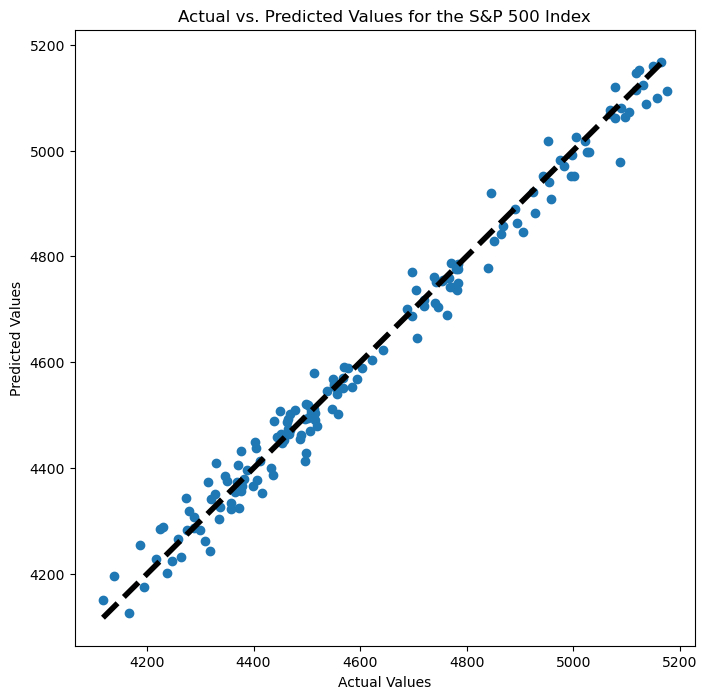

In [176]:
# The best performing model was linear regression
plt.figure(figsize=(8, 8))
y_pred = linear_regression_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for the S&P 500 Index')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

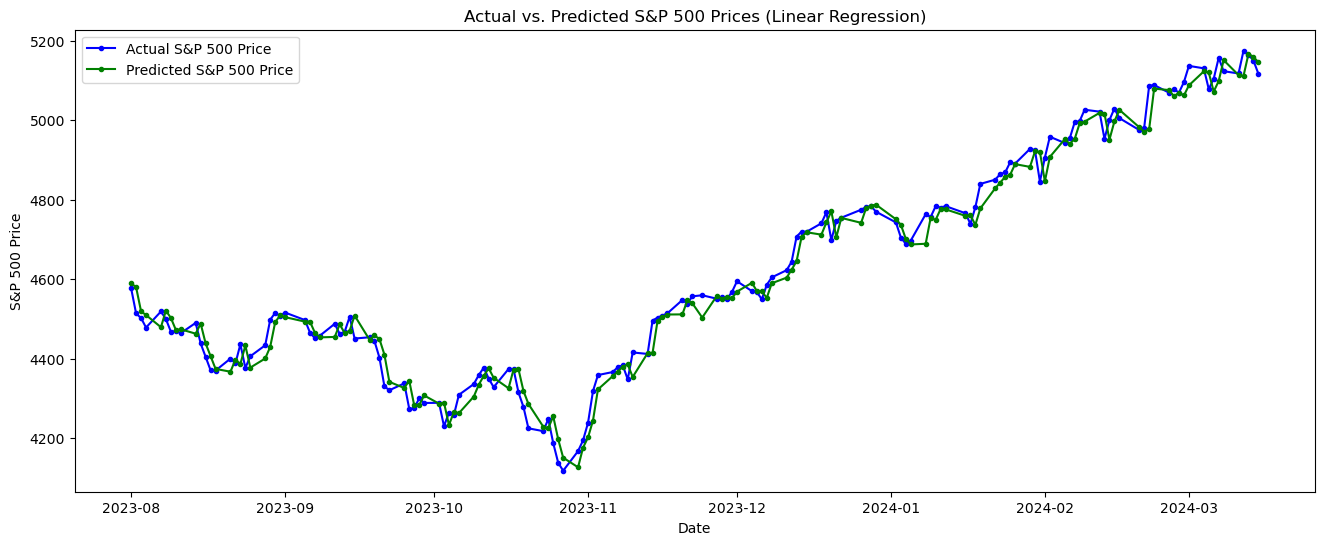

In [179]:
dates_test = X_test_preprocessed.index

# Plotting the actual vs. predicted values
plt.figure(figsize=(16, 6))
plt.plot(dates_test, y_test, label='Actual S&P 500 Price', color='blue', linestyle='-', marker='.')
plt.plot(dates_test, y_pred, label='Predicted S&P 500 Price', color='green', linestyle='-', marker='.')

plt.title('Actual vs. Predicted S&P 500 Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.legend()
plt.show()

In [180]:
comparison_df = pd.DataFrame({
    'Date': dates_test,
    'Predicted Next Day': y_pred,
    'Actual Next Day': y_test.values
})

comparison_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
comparison_df

Date  Predicted Next Day  Actual Next Day
0   2023-08-01         4589.719960          4576.73
1   2023-08-02         4579.493108          4513.39
2   2023-08-03         4518.736343          4501.89
3   2023-08-04         4509.414372          4478.03
4   2023-08-07         4478.956037          4518.44
..         ...                 ...              ...
153 2024-03-11         5113.933351          5117.94
154 2024-03-12         5111.766744          5175.27
155 2024-03-13         5167.416515          5165.31
156 2024-03-14         5159.623724          5150.48
157 2024-03-15         5146.322238          5117.09

[158 rows x 3 columns]